In [1]:
import pennylane as qml
from pennylane import numpy as np
from matplotlib import pyplot as plt
import time
from supplementary_code import *

In [2]:
nq = 10
depth = int(nq/2)
dev = qml.device("default.qubit", wires= nq) 

In [3]:
Delta = 1.5
H = H_XXZ(Delta,wires=range(nq))

print(H)

  (1) [X0 X1]
+ (1) [Y0 Y1]
+ (1) [X1 X2]
+ (1) [Y1 Y2]
+ (1) [X2 X3]
+ (1) [Y2 Y3]
+ (1) [X3 X4]
+ (1) [Y3 Y4]
+ (1) [X4 X5]
+ (1) [Y4 Y5]
+ (1) [X5 X6]
+ (1) [Y5 Y6]
+ (1) [X6 X7]
+ (1) [Y6 Y7]
+ (1) [X7 X8]
+ (1) [Y7 Y8]
+ (1) [X8 X9]
+ (1) [Y8 Y9]
+ (1) [X9 X0]
+ (1) [Y9 Y0]
+ (1.5) [Z0 Z1]
+ (1.5) [Z1 Z2]
+ (1.5) [Z2 Z3]
+ (1.5) [Z3 Z4]
+ (1.5) [Z4 Z5]
+ (1.5) [Z5 Z6]
+ (1.5) [Z6 Z7]
+ (1.5) [Z7 Z8]
+ (1.5) [Z8 Z9]
+ (1.5) [Z9 Z0]


In [4]:
params = np.array([np.pi for _ in range(4*depth)])

In [5]:
@qml.qnode(dev)
def circuit(params, Delta, depth=depth, nq=nq):
    
    HVA_ansatz(params, Delta, depth, range(nq))
    
    return qml.expval(H)

In [6]:
cost_fn = lambda w: circuit(w, Delta=Delta, depth=depth, nq=nq)

In [7]:
start_time = time.time()    

steps = 200

optimizer = qml.AdamOptimizer(stepsize=0.5)
best_cost = cost_fn(params)
best_params = params

for j in range(steps+1):
    params2 = params
    params, cost = optimizer.step_and_cost(cost_fn, params)

    if cost < best_cost:
        best_params = params2
        best_cost = cost
        
    if j!=0 and j % 2 == 0:
        print(f"Cost at Step {j}: {cost}")

end_time = time.time()
print('Time taken: ', (end_time-start_time)/60, ' mins.')

Cost at Step 2: -6.361074182727292
Cost at Step 4: -7.815887088579281
Cost at Step 6: -9.867094193643968
Cost at Step 8: -12.63402225178675
Cost at Step 10: -10.223131856034898
Cost at Step 12: -14.233523307893302
Cost at Step 14: -16.3589079508871
Cost at Step 16: -17.863235311275215
Cost at Step 18: -18.547447628244583
Cost at Step 20: -18.288069772513406
Cost at Step 22: -18.437237788135494
Cost at Step 24: -19.044887809605786
Cost at Step 26: -18.873371852619393
Cost at Step 28: -19.61724732467074
Cost at Step 30: -19.76560430160497
Cost at Step 32: -20.099630919590275
Cost at Step 34: -20.218817673887315
Cost at Step 36: -20.573862169681483
Cost at Step 38: -20.701575935659406
Cost at Step 40: -20.786350316845585
Cost at Step 42: -20.898672589712415
Cost at Step 44: -20.956475732369423
Cost at Step 46: -20.980102749911826
Cost at Step 48: -21.065956571448737
Cost at Step 50: -21.04268270276332
Cost at Step 52: -21.047255155076346
Cost at Step 54: -21.036082662926106
Cost at Step 5

In [8]:
print(best_cost)

-21.19965809627802


In [9]:
print(cost_fn(best_params))

-21.19965809627802


In [10]:
print(np.array(best_params))

[ 1.26574585e+00  3.14506726e+00  5.56554675e-03  2.11318946e+00
  2.65397152e+00  3.31665853e+00  3.18703851e+00  3.31087070e+00
  4.15958763e+00  1.41156150e-01  3.66530680e+00  2.41586795e+00
  1.63734631e+00  6.94390936e+00 -2.42073321e-01  3.24774242e+00
  3.10708618e+00  2.69572312e+00  4.97193672e+00  6.31672592e+00]


In [12]:
for i in range(1,10):
    
    corr = corr_function(i, best_params,Delta,depth, nq)
    
    print(i,np.abs(corr))

1 0.7291035599630475
2 0.445436278498051
3 0.4344675372020078
4 0.3878613499942962
5 0.39595060883775934
6 0.387861349994296
7 0.4220707994323915
8 0.445436278498051
9 0.6850027515494882


In [14]:
# Time evolution

corr_t = []
t = []
i =  3
dt = 1/400

start_time = time.time()    
for step in range(401):
    
    t.append(dt*step)
    
    corr_dt = corr_function(i, best_params, Delta, depth, nq, perturbation='hamiltonian',timesteps=step)
    
    print(step,corr_dt)
    corr_t.append(corr_dt)
    
end_time = time.time()
print('Time taken: ', (end_time-start_time)/60, ' mins.')

0 -0.4344675372020078
1 -0.43436094612940834
2 -0.434221732282074
3 -0.43404990457930304
4 -0.43384547788701067
5 -0.4336084730161087
6 -0.4333389167194236
7 -0.43303684168715273
8 -0.4327022865408545
9 -0.4323352958259829
10 -0.43193592000295994
11 -0.4315042154367935
12 -0.4310402443852437
13 -0.43054407498553715
14 -0.4300157812396366
15 -0.42945544299806937
16 -0.42886314594231795
17 -0.42823898156577944
18 -0.4275830471532961
19 -0.42689544575926963
20 -0.42617628618435716
21 -0.42542568295076033
22 -0.4246437562761157
23 -0.423830632045991
24 -0.42298644178499645
25 -0.4221113226265178
26 -0.4212054172810852
27 -0.42026887400338014
28 -0.41930184655789426
29 -0.4183044941832503
30 -0.41727698155519016
31 -0.41621947874825016
32 -0.4151321611961263
33 -0.4140152096507421
34 -0.4128688101400365
35 -0.41169315392447947
36 -0.4104884374523257
37 -0.4092548623136292
38 -0.4079926351930148
39 -0.40670196782124174
40 -0.4053830769255567
41 -0.40403618417885645
42 -0.40266151614767587
43

332 -0.014315669808809023
333 -0.014884602261041657
334 -0.015459194652752278
335 -0.016039267904929877
336 -0.01662464407681266
337 -0.01721514640006891
338 -0.017810599312292702
339 -0.018410828489808323
340 -0.01901566087977863
341 -0.01962492473161187
342 -0.020238449627665772
343 -0.02085606651324115
344 -0.02147760772586027
345 -0.02210290702383269
346 -0.022731799614097437
347 -0.02336412217934397
348 -0.02399971290440639
349 -0.024638411501929164
350 -0.025280059237302144
351 -0.0259244989528625
352 -0.02657157509136332
353 -0.027221133718703966
354 -0.027873022545925996
355 -0.028527090950468403
356 -0.029183189996685982
357 -0.029841172455626952
358 -0.030500892824072506
359 -0.031162207342836756
360 -0.031824974014327684
361 -0.03248905261936885
362 -0.03315430473328598
363 -0.03382059374125582
364 -0.0344877848529197
365 -0.03515574511626518
366 -0.03582434343077634
367 -0.03649345055985323
368 -0.037162939142506846
369 -0.03783268370432755
370 -0.03850256066773433
371 -0.0

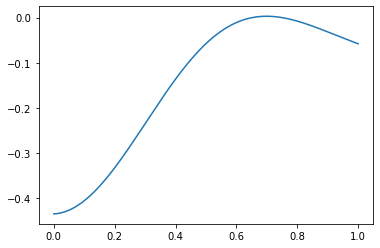

In [15]:
plt.plot(np.linspace(0,1,401),np.real(corr_t))

In [16]:
np.array(corr_t)

tensor([-4.34467537e-01, -4.34360946e-01, -4.34221732e-01,
        -4.34049905e-01, -4.33845478e-01, -4.33608473e-01,
        -4.33338917e-01, -4.33036842e-01, -4.32702287e-01,
        -4.32335296e-01, -4.31935920e-01, -4.31504215e-01,
        -4.31040244e-01, -4.30544075e-01, -4.30015781e-01,
        -4.29455443e-01, -4.28863146e-01, -4.28238982e-01,
        -4.27583047e-01, -4.26895446e-01, -4.26176286e-01,
        -4.25425683e-01, -4.24643756e-01, -4.23830632e-01,
        -4.22986442e-01, -4.22111323e-01, -4.21205417e-01,
        -4.20268874e-01, -4.19301847e-01, -4.18304494e-01,
        -4.17276982e-01, -4.16219479e-01, -4.15132161e-01,
        -4.14015210e-01, -4.12868810e-01, -4.11693154e-01,
        -4.10488437e-01, -4.09254862e-01, -4.07992635e-01,
        -4.06701968e-01, -4.05383077e-01, -4.04036184e-01,
        -4.02661516e-01, -4.01259304e-01, -3.99829785e-01,
        -3.98373198e-01, -3.96889791e-01, -3.95379812e-01,
        -3.93843518e-01, -3.92281166e-01, -3.90693021e-0

In [17]:
h = [-4.34467537e-01, -4.34360946e-01, -4.34221732e-01,
        -4.34049905e-01, -4.33845478e-01, -4.33608473e-01,
        -4.33338917e-01, -4.33036842e-01, -4.32702287e-01,
        -4.32335296e-01, -4.31935920e-01, -4.31504215e-01,
        -4.31040244e-01, -4.30544075e-01, -4.30015781e-01,
        -4.29455443e-01, -4.28863146e-01, -4.28238982e-01,
        -4.27583047e-01, -4.26895446e-01, -4.26176286e-01,
        -4.25425683e-01, -4.24643756e-01, -4.23830632e-01,
        -4.22986442e-01, -4.22111323e-01, -4.21205417e-01,
        -4.20268874e-01, -4.19301847e-01, -4.18304494e-01,
        -4.17276982e-01, -4.16219479e-01, -4.15132161e-01,
        -4.14015210e-01, -4.12868810e-01, -4.11693154e-01,
        -4.10488437e-01, -4.09254862e-01, -4.07992635e-01,
        -4.06701968e-01, -4.05383077e-01, -4.04036184e-01,
        -4.02661516e-01, -4.01259304e-01, -3.99829785e-01,
        -3.98373198e-01, -3.96889791e-01, -3.95379812e-01,
        -3.93843518e-01, -3.92281166e-01, -3.90693021e-01,
        -3.89079352e-01, -3.87440429e-01, -3.85776530e-01,
        -3.84087936e-01, -3.82374932e-01, -3.80637807e-01,
        -3.78876853e-01, -3.77092367e-01, -3.75284651e-01,
        -3.73454009e-01, -3.71600749e-01, -3.69725183e-01,
        -3.67827626e-01, -3.65908397e-01, -3.63967819e-01,
        -3.62006217e-01, -3.60023920e-01, -3.58021260e-01,
        -3.55998572e-01, -3.53956195e-01, -3.51894470e-01,
        -3.49813740e-01, -3.47714353e-01, -3.45596658e-01,
        -3.43461008e-01, -3.41307756e-01, -3.39137261e-01,
        -3.36949882e-01, -3.34745980e-01, -3.32525921e-01,
        -3.30290069e-01, -3.28038794e-01, -3.25772466e-01,
        -3.23491457e-01, -3.21196140e-01, -3.18886893e-01,
        -3.16564091e-01, -3.14228113e-01, -3.11879341e-01,
        -3.09518155e-01, -3.07144939e-01, -3.04760078e-01,
        -3.02363955e-01, -2.99956957e-01, -2.97539473e-01,
        -2.95111889e-01, -2.92674596e-01, -2.90227981e-01,
        -2.87772436e-01, -2.85308352e-01, -2.82836118e-01,
        -2.80356128e-01, -2.77868772e-01, -2.75374442e-01,
        -2.72873530e-01, -2.70366429e-01, -2.67853530e-01,
        -2.65335224e-01, -2.62811904e-01, -2.60283960e-01,
        -2.57751782e-01, -2.55215762e-01, -2.52676288e-01,
        -2.50133749e-01, -2.47588534e-01, -2.45041029e-01,
        -2.42491621e-01, -2.39940695e-01, -2.37388636e-01,
        -2.34835826e-01, -2.32282647e-01, -2.29729480e-01,
        -2.27176704e-01, -2.24624695e-01, -2.22073831e-01,
        -2.19524486e-01, -2.16977032e-01, -2.14431839e-01,
        -2.11889278e-01, -2.09349715e-01, -2.06813515e-01,
        -2.04281040e-01, -2.01752652e-01, -1.99228710e-01,
        -1.96709569e-01, -1.94195583e-01, -1.91687103e-01,
        -1.89184479e-01, -1.86688057e-01, -1.84198180e-01,
        -1.81715190e-01, -1.79239424e-01, -1.76771218e-01,
        -1.74310904e-01, -1.71858813e-01, -1.69415269e-01,
        -1.66980597e-01, -1.64555117e-01, -1.62139145e-01,
        -1.59732997e-01, -1.57336981e-01, -1.54951405e-01,
        -1.52576573e-01, -1.50212786e-01, -1.47860338e-01,
        -1.45519525e-01, -1.43190635e-01, -1.40873953e-01,
        -1.38569763e-01, -1.36278342e-01, -1.33999965e-01,
        -1.31734903e-01, -1.29483422e-01, -1.27245784e-01,
        -1.25022250e-01, -1.22813073e-01, -1.20618505e-01,
        -1.18438792e-01, -1.16274177e-01, -1.14124897e-01,
        -1.11991188e-01, -1.09873278e-01, -1.07771395e-01,
        -1.05685759e-01, -1.03616587e-01, -1.01564092e-01,
        -9.95284828e-02, -9.75099629e-02, -9.55087319e-02,
        -9.35249851e-02, -9.15589131e-02, -8.96107021e-02,
        -8.76805338e-02, -8.57685854e-02, -8.38750296e-02,
        -8.20000344e-02, -8.01437634e-02, -7.83063757e-02,
        -7.64880255e-02, -7.46888628e-02, -7.29090328e-02,
        -7.11486760e-02, -6.94079284e-02, -6.76869215e-02,
        -6.59857820e-02, -6.43046321e-02, -6.26435892e-02,
        -6.10027662e-02, -5.93822714e-02, -5.77822085e-02,
        -5.62026765e-02, -5.46437697e-02, -5.31055781e-02,
        -5.15881867e-02, -5.00916763e-02, -4.86161228e-02,
        -4.71615977e-02, -4.57281680e-02, -4.43158959e-02,
        -4.29248393e-02, -4.15550516e-02, -4.02065814e-02,
        -3.88794731e-02, -3.75737666e-02, -3.62894973e-02,
        -3.50266961e-02, -3.37853896e-02, -3.25656000e-02,
        -3.13673451e-02, -3.01906384e-02, -2.90354891e-02,
        -2.79019020e-02, -2.67898778e-02, -2.56994130e-02,
        -2.46304996e-02, -2.35831258e-02, -2.25572754e-02,
        -2.15529283e-02, -2.05700601e-02, -1.96086426e-02,
        -1.86686434e-02, -1.77500263e-02, -1.68527509e-02,
        -1.59767733e-02, -1.51220453e-02, -1.42885153e-02,
        -1.34761276e-02, -1.26848229e-02, -1.19145382e-02,
        -1.11652069e-02, -1.04367586e-02, -9.72911955e-03,
        -9.04221230e-03, -8.37595601e-03, -7.73026637e-03,
        -7.10505569e-03, -6.50023293e-03, -5.91570376e-03,
        -5.35137058e-03, -4.80713260e-03, -4.28288587e-03,
        -3.77852335e-03, -3.29393493e-03, -2.82900748e-03,
        -2.38362495e-03, -1.95766835e-03, -1.55101587e-03,
        -1.16354287e-03, -7.95121983e-04, -4.45623133e-04,
        -1.14913606e-04,  1.97141902e-04,  4.90681232e-04,
         7.65844705e-04,  1.02277507e-03,  1.26161746e-03,
         1.48251930e-03,  1.68563031e-03,  1.87110240e-03,
         2.03908964e-03,  2.18974818e-03,  2.32323624e-03,
         2.43971401e-03,  2.53934360e-03,  2.62228901e-03,
         2.68871605e-03,  2.73879229e-03,  2.77268700e-03,
         2.79057112e-03,  2.79261715e-03,  2.77899913e-03,
         2.74989261e-03,  2.70547453e-03,  2.64592321e-03,
         2.57141826e-03,  2.48214057e-03,  2.37827222e-03,
         2.25999641e-03,  2.12749745e-03,  1.98096067e-03,
         1.82057237e-03,  1.64651977e-03,  1.45899095e-03,
         1.25817482e-03,  1.04426101e-03,  8.17439860e-04,
         5.77902370e-04,  3.25840113e-04,  6.14452019e-05,
        -2.15089765e-04, -5.03571761e-04, -8.03807383e-04,
        -1.11560290e-03, -1.43876432e-03, -1.77309741e-03,
        -2.11840779e-03, -2.47450095e-03, -2.84118231e-03,
        -3.21825729e-03, -3.60553131e-03, -4.00280991e-03,
        -4.40989872e-03, -4.82660360e-03, -5.25273059e-03,
        -5.68808602e-03, -6.13247655e-03, -6.58570920e-03,
        -7.04759140e-03, -7.51793104e-03, -7.99653653e-03,
        -8.48321680e-03, -8.97778139e-03, -9.48004047e-03,
        -9.98980489e-03, -1.05068862e-02, -1.10310967e-02,
        -1.15622496e-02, -1.21001588e-02, -1.26446392e-02,
        -1.31955065e-02, -1.37525775e-02, -1.43156698e-02,
        -1.48846023e-02, -1.54591947e-02, -1.60392679e-02,
        -1.66246441e-02, -1.72151464e-02, -1.78105993e-02,
        -1.84108285e-02, -1.90156609e-02, -1.96249247e-02,
        -2.02384496e-02, -2.08560665e-02, -2.14776077e-02,
        -2.21029070e-02, -2.27317996e-02, -2.33641222e-02,
        -2.39997129e-02, -2.46384115e-02, -2.52800592e-02,
        -2.59244990e-02, -2.65715751e-02, -2.72211337e-02,
        -2.78730225e-02, -2.85270910e-02, -2.91831900e-02,
        -2.98411725e-02, -3.05008928e-02, -3.11622073e-02,
        -3.18249740e-02, -3.24890526e-02, -3.31543047e-02,
        -3.38205937e-02, -3.44877849e-02, -3.51557451e-02,
        -3.58243434e-02, -3.64934506e-02, -3.71629391e-02,
        -3.78326837e-02, -3.85025607e-02, -3.91724484e-02,
        -3.98422270e-02, -4.05117788e-02, -4.11809879e-02,
        -4.18497402e-02, -4.25179238e-02, -4.31854285e-02,
        -4.38521464e-02, -4.45179711e-02, -4.51827985e-02,
        -4.58465264e-02, -4.65090544e-02, -4.71702844e-02,
        -4.78301198e-02, -4.84884665e-02, -4.91452318e-02,
        -4.98003255e-02, -5.04536590e-02, -5.11051459e-02,
        -5.17547014e-02, -5.24022431e-02, -5.30476903e-02,
        -5.36909642e-02, -5.43319880e-02, -5.49706870e-02,
        -5.56069881e-02, -5.62408205e-02, -5.68721148e-02,
        -5.75008041e-02, -5.81268230e-02]

In [18]:
h

[-0.434467537,
 -0.434360946,
 -0.434221732,
 -0.434049905,
 -0.433845478,
 -0.433608473,
 -0.433338917,
 -0.433036842,
 -0.432702287,
 -0.432335296,
 -0.43193592,
 -0.431504215,
 -0.431040244,
 -0.430544075,
 -0.430015781,
 -0.429455443,
 -0.428863146,
 -0.428238982,
 -0.427583047,
 -0.426895446,
 -0.426176286,
 -0.425425683,
 -0.424643756,
 -0.423830632,
 -0.422986442,
 -0.422111323,
 -0.421205417,
 -0.420268874,
 -0.419301847,
 -0.418304494,
 -0.417276982,
 -0.416219479,
 -0.415132161,
 -0.41401521,
 -0.41286881,
 -0.411693154,
 -0.410488437,
 -0.409254862,
 -0.407992635,
 -0.406701968,
 -0.405383077,
 -0.404036184,
 -0.402661516,
 -0.401259304,
 -0.399829785,
 -0.398373198,
 -0.396889791,
 -0.395379812,
 -0.393843518,
 -0.392281166,
 -0.390693021,
 -0.389079352,
 -0.387440429,
 -0.38577653,
 -0.384087936,
 -0.382374932,
 -0.380637807,
 -0.378876853,
 -0.377092367,
 -0.375284651,
 -0.373454009,
 -0.371600749,
 -0.369725183,
 -0.367827626,
 -0.365908397,
 -0.363967819,
 -0.362006217,